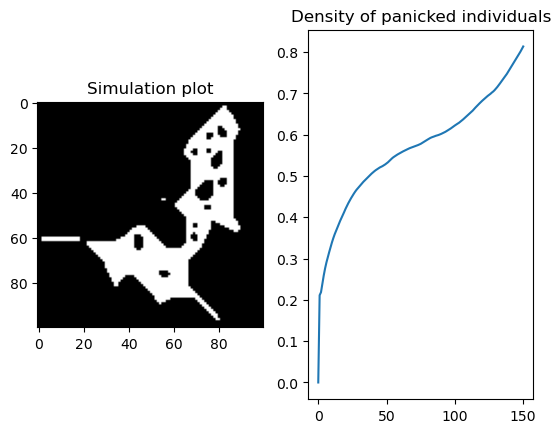

In [25]:
import pylab
import numpy as np
%matplotlib inline

n = 100 # size of space: n x n
p = 0.28 # probability of initially panicky individuals

def initialize():
    global config, nextconfig, density
    config = np.zeros([n, n])
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if pylab.random() < p else 0
    nextconfig = np.zeros([n, n])
    density = [np.count_nonzero(nextconfig == 1)/(len(nextconfig)**2)]
    
def observe():
    global config, nextconfig, density
    pylab.cla()
    pylab.subplot(1,2,1)
    pylab.imshow(config, vmin = 0, vmax = 1, cmap = pylab.cm.binary)
    pylab.title('Simulation plot')
    pylab.subplot(1,2,2)
    pylab.plot(density)
    pylab.title('Density of panicked individuals')
    
def update():
    global config, nextconfig
    for x in range(n):
        for y in range(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
                nextconfig[x, y] = 1 if count >= 4 else 0
    density.append(np.count_nonzero(nextconfig == 1)/(len(nextconfig)**2))
    config, nextconfig = nextconfig, config
    
initialize()
for i in range(150):
    update()
observe()